### **Feature Engineering**


### **Cài đặt thư viện**


In [41]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-05-21 22:46:25 +07:00)


### **SmallDS**

In [42]:
df_watch = pd.read_csv("../main copy/clean_data/small_ds.csv")

df_watch.head()


,Thương hiệu,Giá tiền (VNĐ),Chất liệu dây,Chất liệu vỏ,Xuất xứ,Giới tính,Chất liệu mặt kính,Độ chịu nước (ATM),Bảo hành,Kiểu máy,Kích cỡ (mm)
0,Certina,19610000,Thép không gỉ,Thép không gỉ,Thụy Sĩ,Nam,Kính sapphire,10.0,2.0,Automatic,40.0
1,Tissot,26775000,Thép không gỉ,Thép không gỉ,Thụy Sĩ,Nữ,Kính sapphire,3.0,2.0,Automatic,32.0
2,Citizen,3272500,Thép không gỉ,Thép không gỉ,Nhật Bản,Nữ,Kính cứng,5.0,1.0,Quartz,35.0
3,Olym Pianus,3130000,Thép không gỉ,Thép không gỉ,Nhật Bản,Nữ,Kính sapphire,3.0,2.0,Quartz,25.0
4,Tissot,34650000,Dây da,Thép không gỉ,Thụy Sĩ,Nữ,Kính sapphire,5.0,2.0,Quartz,31.6


time: 32 ms (started: 2023-05-21 22:46:25 +07:00)


In [43]:
df_watch.shape

(1000, 11)

time: 0 ns (started: 2023-05-21 22:46:25 +07:00)


In [44]:
df_watch.dtypes

Thương hiệu            object
Giá tiền (VNĐ)          int64
Chất liệu dây          object
Chất liệu vỏ           object
Xuất xứ                object
Giới tính              object
Chất liệu mặt kính     object
Độ chịu nước (ATM)    float64
Bảo hành              float64
Kiểu máy               object
Kích cỡ (mm)          float64
dtype: object

time: 0 ns (started: 2023-05-21 22:46:25 +07:00)


In [45]:
df_watch.isna().sum()

Thương hiệu           19
Giá tiền (VNĐ)         0
Chất liệu dây         24
Chất liệu vỏ          34
Xuất xứ               19
Giới tính              2
Chất liệu mặt kính     1
Độ chịu nước (ATM)    10
Bảo hành               8
Kiểu máy               0
Kích cỡ (mm)          17
dtype: int64

time: 16 ms (started: 2023-05-21 22:46:25 +07:00)


- Các cột null ở mức độ tương đối


Chuyển kiểu dữ liệu cột giá tiền

In [46]:
df_watch["Giá tiền (VNĐ)"] = df_watch["Giá tiền (VNĐ)"].astype(float)

time: 0 ns (started: 2023-05-21 22:46:25 +07:00)


### Điền miss value theo giá trị hay xuất hiện nhất

In [47]:
df_watch = df_watch.apply(lambda x: x.fillna(x.value_counts().index[0]))

time: 31 ms (started: 2023-05-21 22:46:26 +07:00)


In [48]:
df_watch.isnull().sum()


Thương hiệu           0
Giá tiền (VNĐ)        0
Chất liệu dây         0
Chất liệu vỏ          0
Xuất xứ               0
Giới tính             0
Chất liệu mặt kính    0
Độ chịu nước (ATM)    0
Bảo hành              0
Kiểu máy              0
Kích cỡ (mm)          0
dtype: int64

time: 16 ms (started: 2023-05-21 22:46:26 +07:00)


Processing Categorical Features


In [49]:
from sklearn.preprocessing import LabelEncoder

name_cols_numeric = [
    "Giá tiền (VNĐ)",
    "Độ chịu nước (ATM)",
    "Kích cỡ (mm)",
]

name_cols = list(df_watch.columns)

for val in name_cols:
    if val in name_cols_numeric:
        name_cols.remove(val)

name_cols_cate = name_cols


def encoding_category_col(df, lst_col):
    for val in lst_col:
        le = LabelEncoder()
        df[val] = le.fit_transform(df[val])

    return df


df_watch = encoding_category_col(df_watch, name_cols_cate)

df_watch.head()

,Thương hiệu,Giá tiền (VNĐ),Chất liệu dây,Chất liệu vỏ,Xuất xứ,Giới tính,Chất liệu mặt kính,Độ chịu nước (ATM),Bảo hành,Kiểu máy,Kích cỡ (mm)
0,8,19610000.0,10,3,5,0,3,10.0,1,0,40.0
1,50,26775000.0,10,3,5,1,3,3.0,1,0,32.0
2,9,3272500.0,10,3,2,1,0,5.0,0,6,35.0
3,36,3130000.0,10,3,2,1,3,3.0,1,6,25.0
4,50,34650000.0,1,3,5,1,3,5.0,1,6,31.6


time: 31 ms (started: 2023-05-21 22:46:26 +07:00)


Train & Test Dataset


In [50]:
from sklearn.model_selection import train_test_split

train_ds, test_ds = train_test_split(df_watch, test_size=0.2, random_state=0)


time: 15 ms (started: 2023-05-21 22:46:26 +07:00)


Distribution train_ds


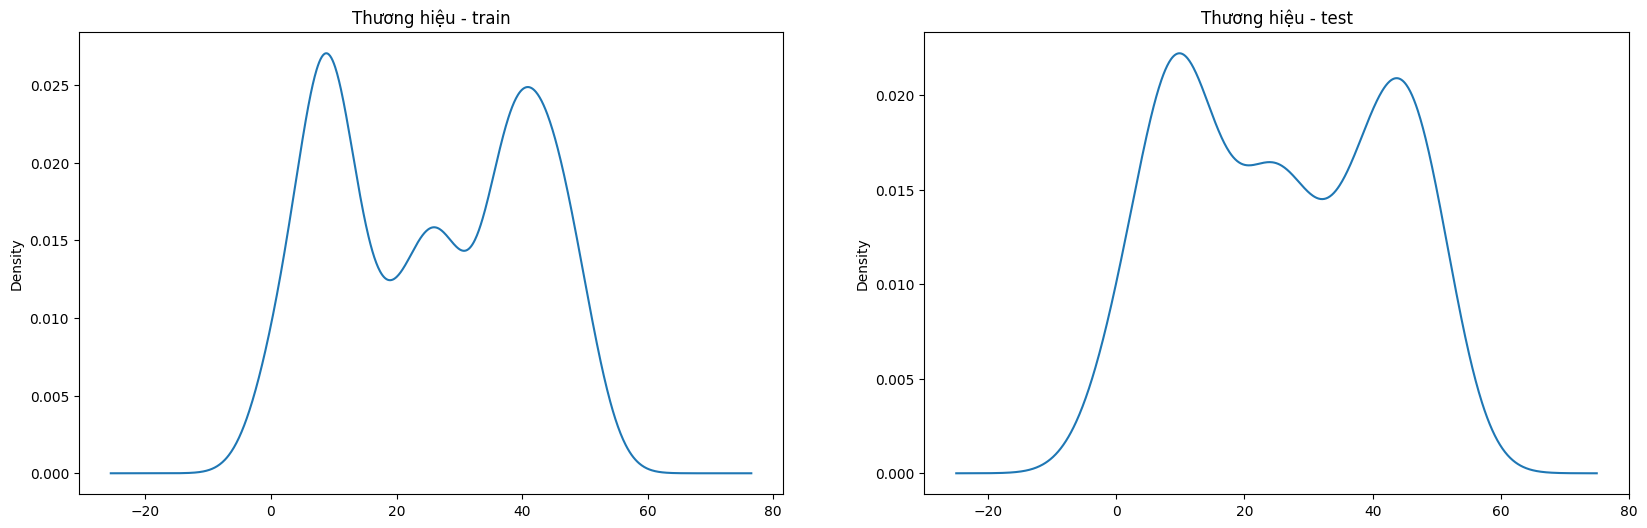

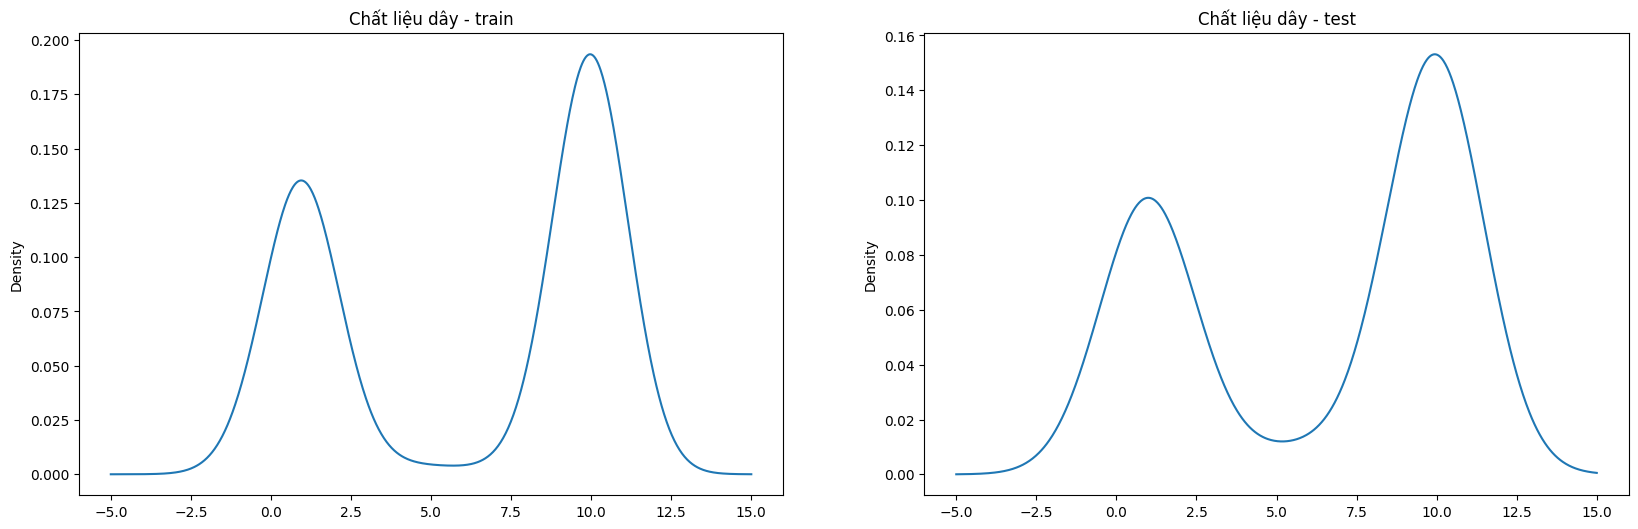

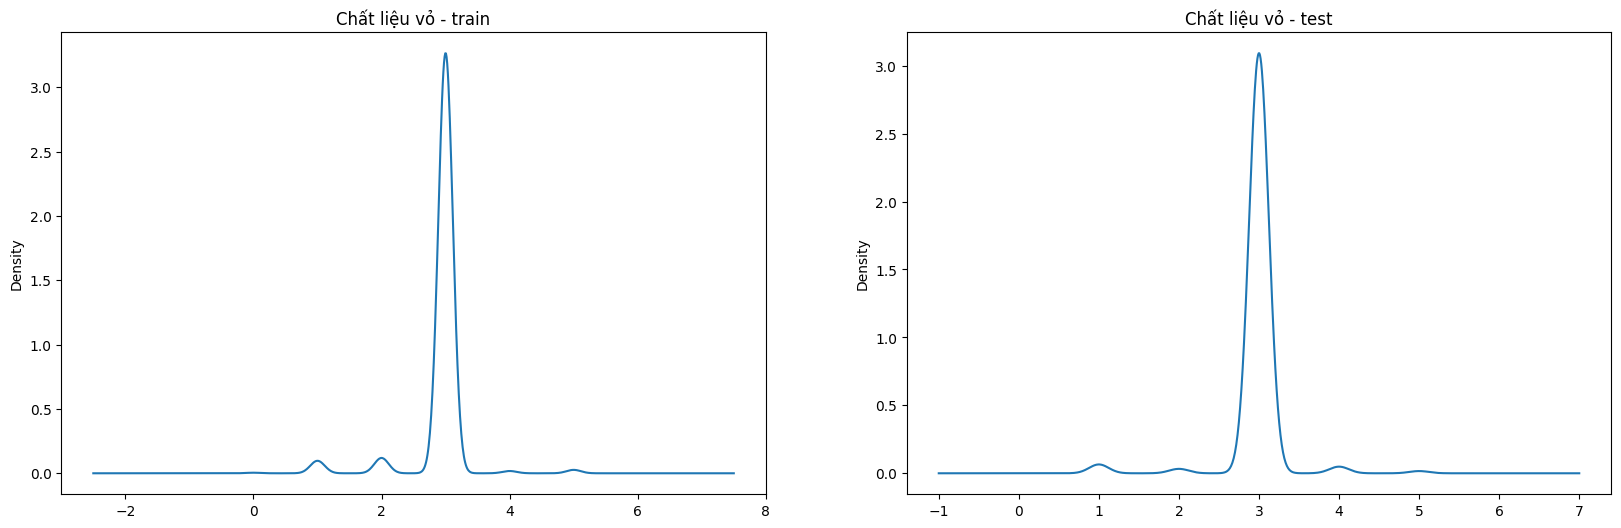

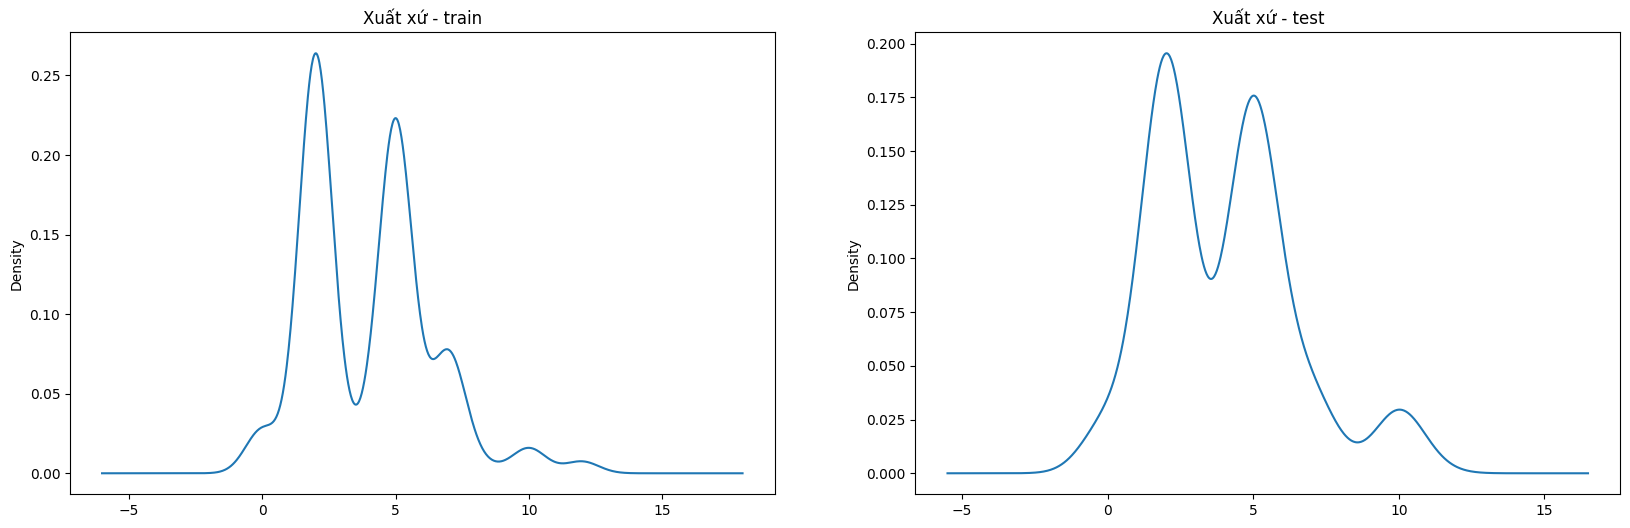

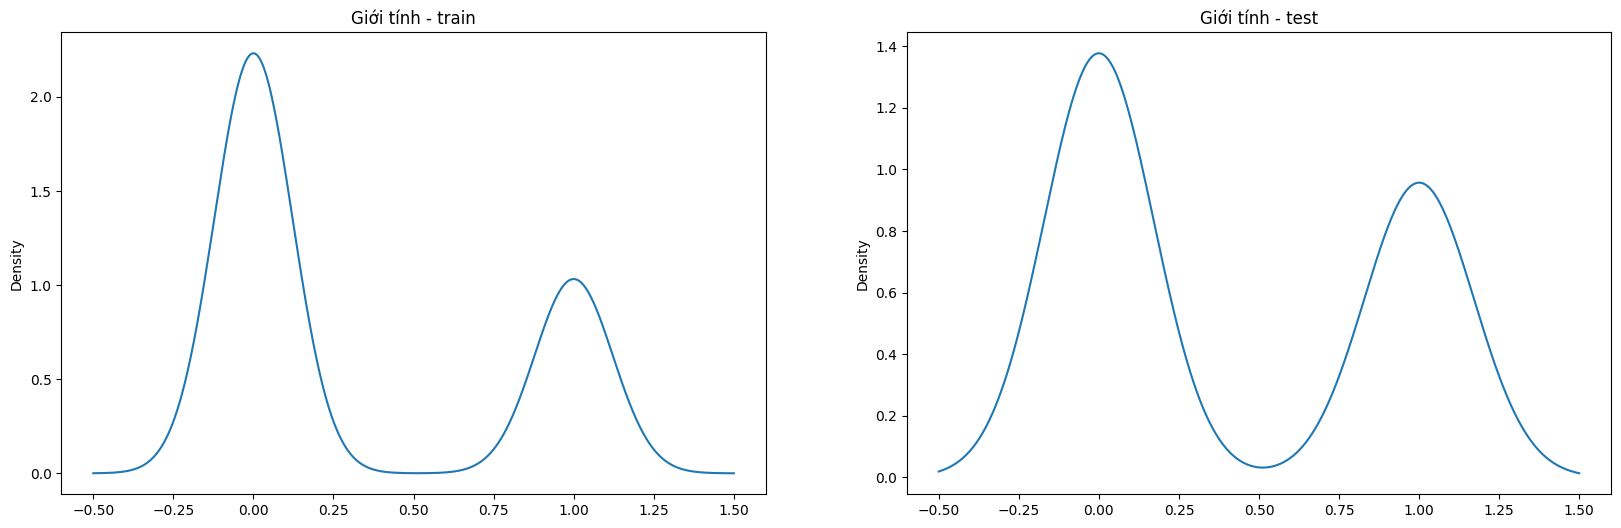

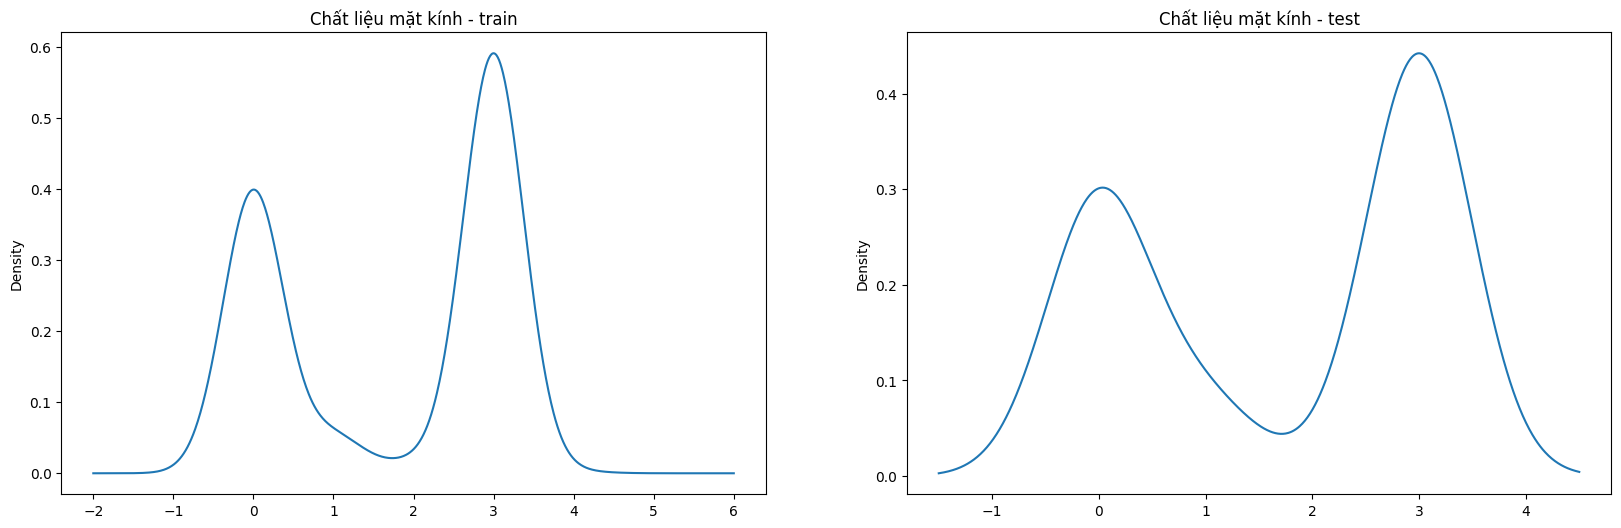

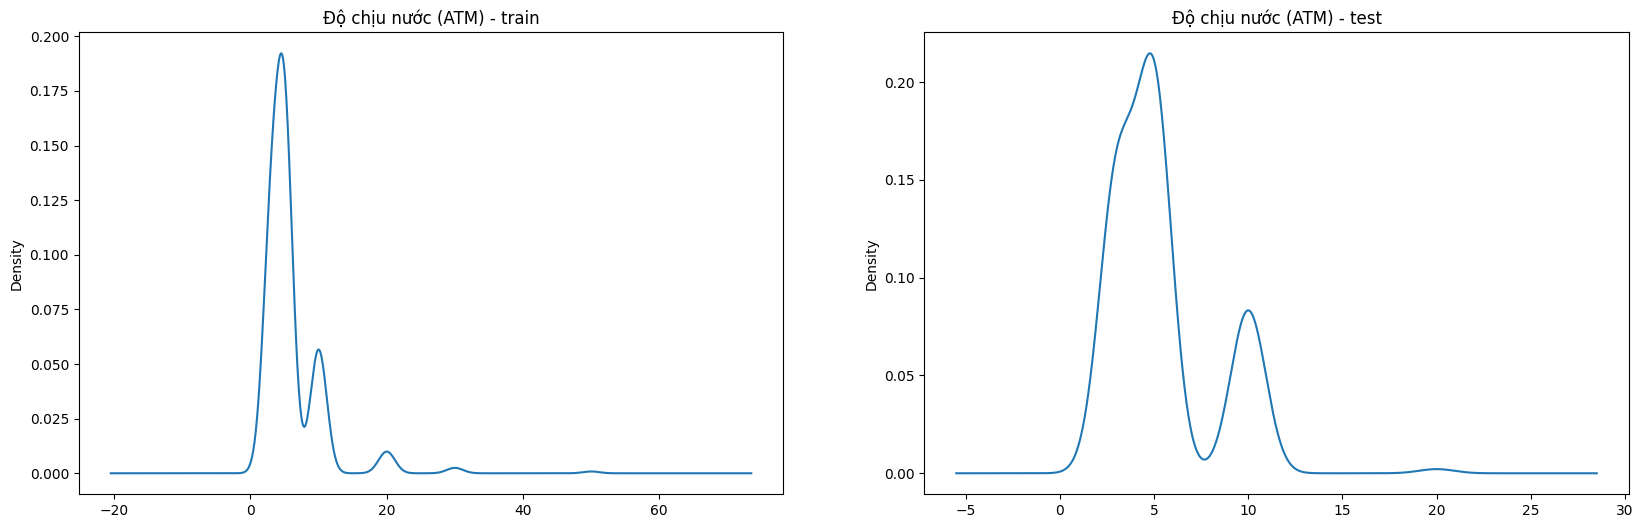

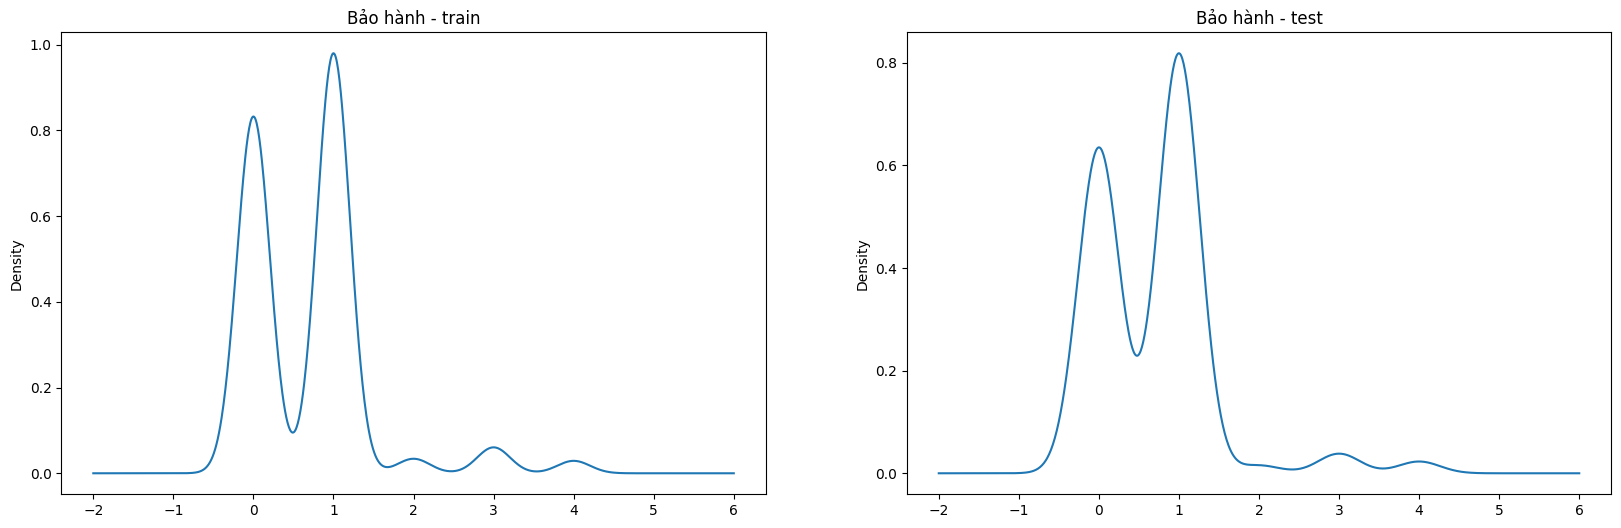

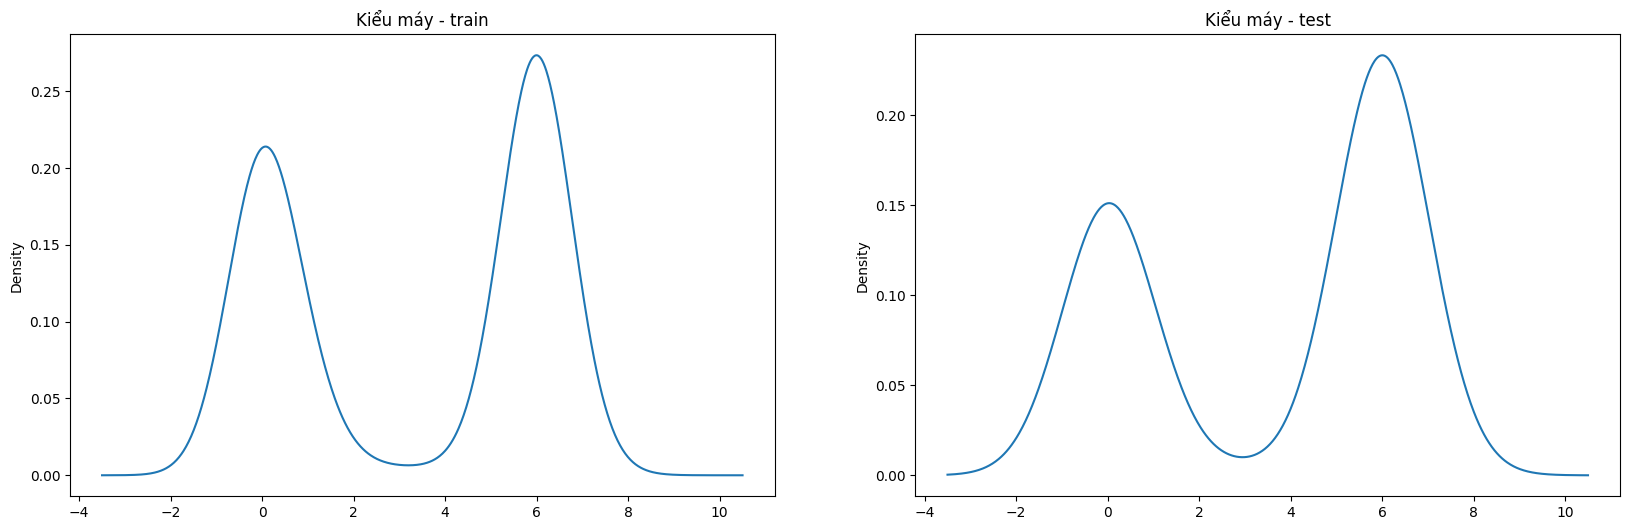

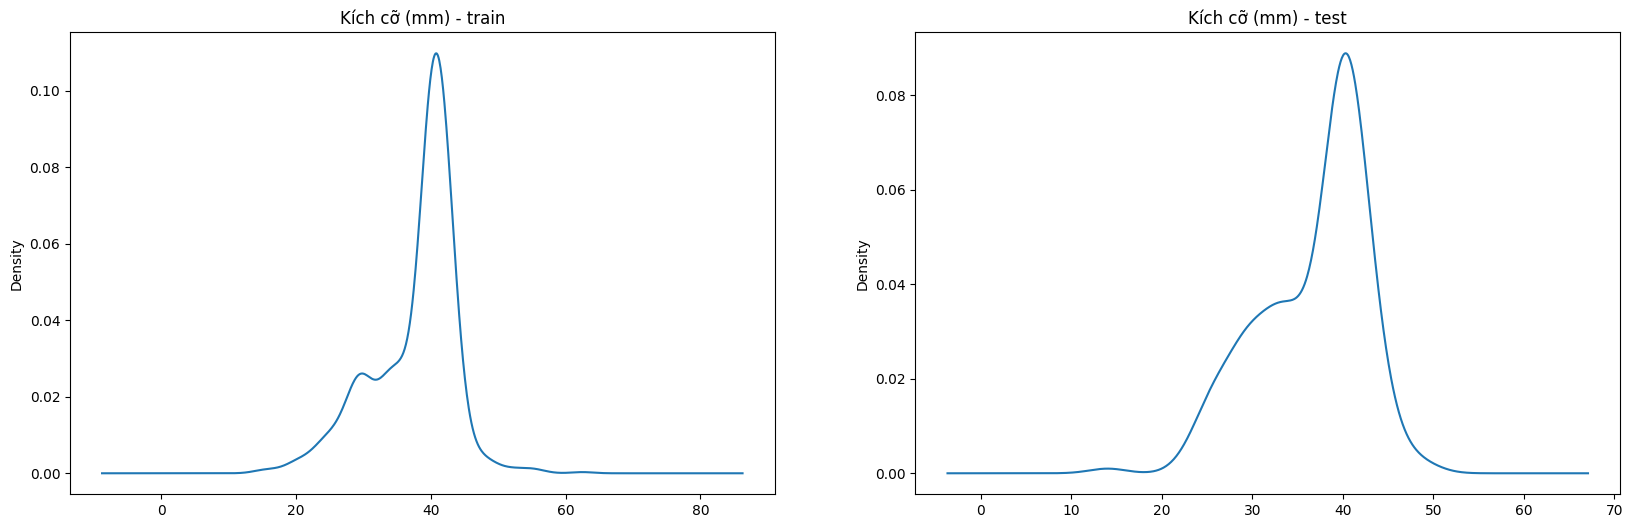

time: 4.76 s (started: 2023-05-21 22:46:26 +07:00)


In [51]:
for c in list(df_watch.columns.drop(["Giá tiền (VNĐ)"])):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    ax1 = plt.subplot(121)

    ax1 = train_ds[c].plot(kind="kde")
    ax1.set_title(f"{c} - train")

    ax2 = plt.subplot(122)
    ax2 = test_ds[c].plot(kind="kde")
    ax2.set_title(f"{c} - test")


plt.show();


Outlier processing


In [52]:
def outlier_processing(X):
    for name_col in list(X.columns):
        upper_bound = X[name_col].mean() + 3 * X[name_col].std()
        lower_bound = X[name_col].mean() - 3 * X[name_col].std()

        X.loc[X[name_col] < lower_bound, name_col] = lower_bound
        X.loc[X[name_col] > upper_bound, name_col] = upper_bound

        return X

    return X


time: 0 ns (started: 2023-05-21 22:46:31 +07:00)


<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Thương hiệu')

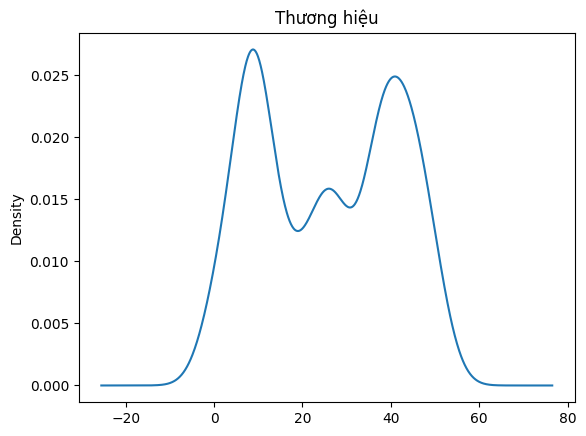

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Giá tiền (VNĐ)')

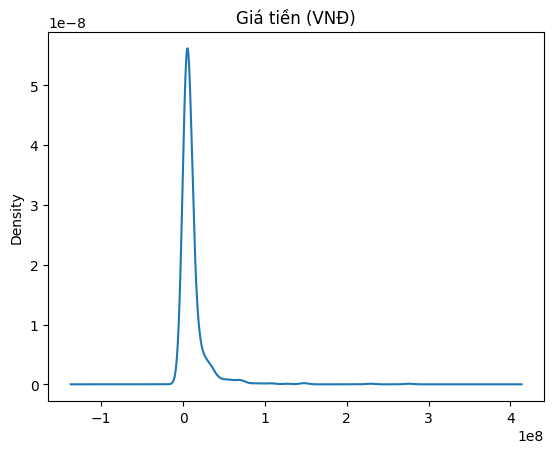

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Chất liệu dây')

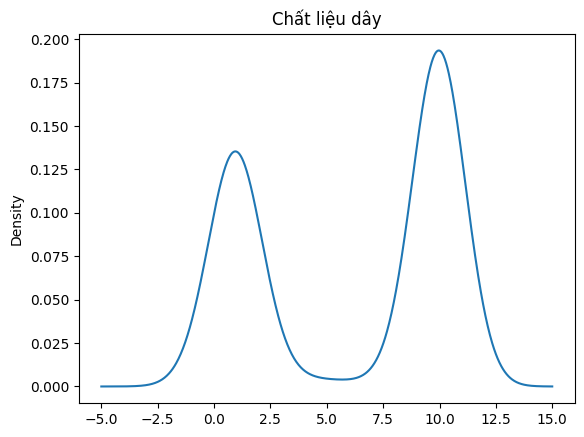

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Chất liệu vỏ')

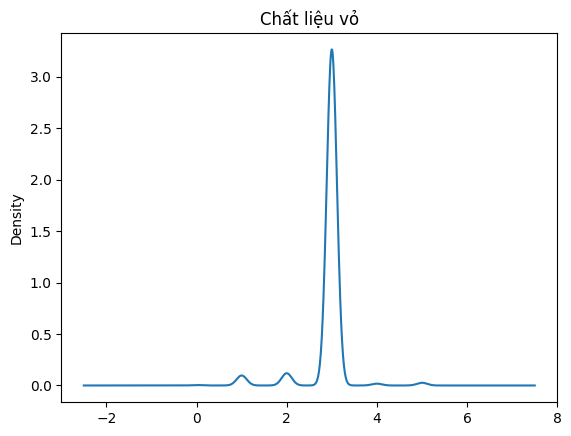

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Xuất xứ')

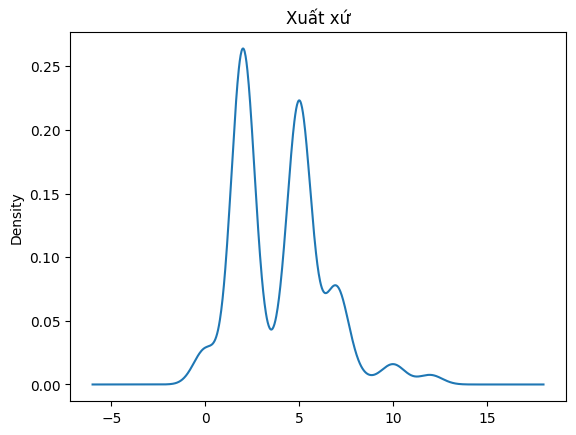

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Giới tính')

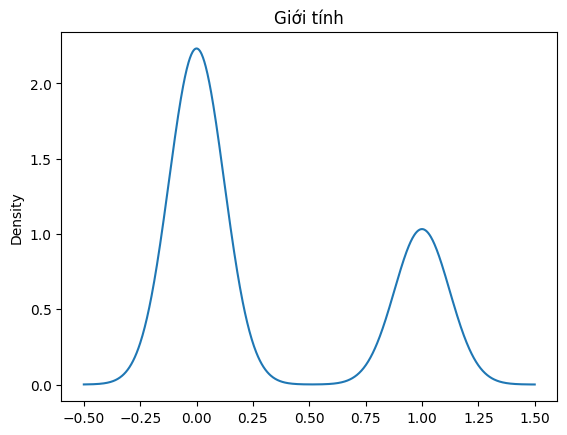

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Chất liệu mặt kính')

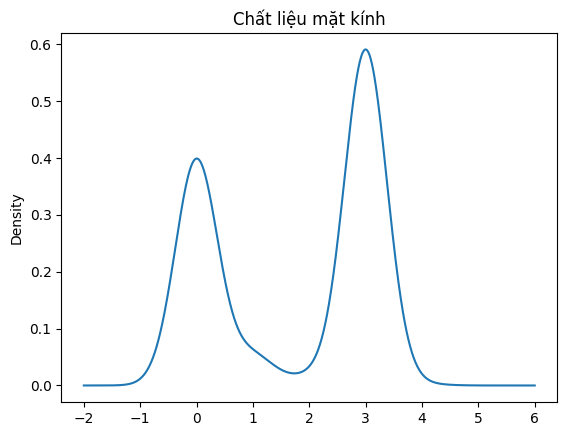

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Độ chịu nước (ATM)')

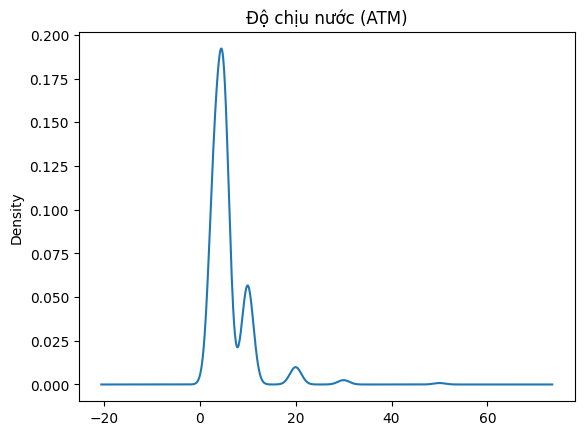

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Bảo hành')

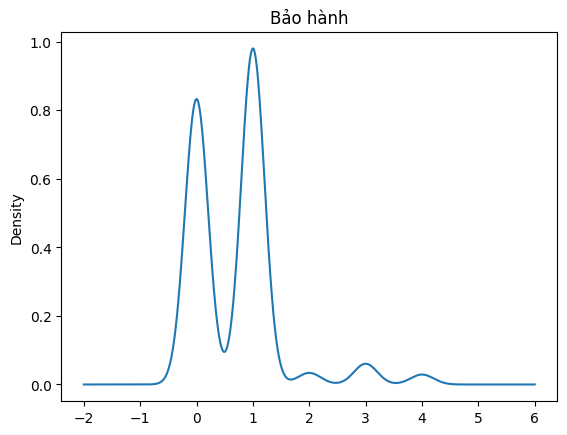

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Kiểu máy')

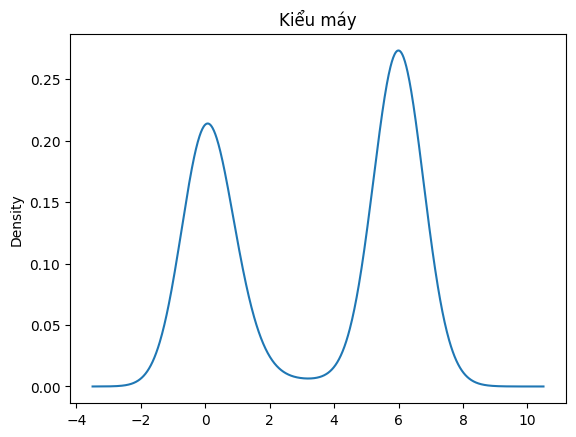

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Kích cỡ (mm)')

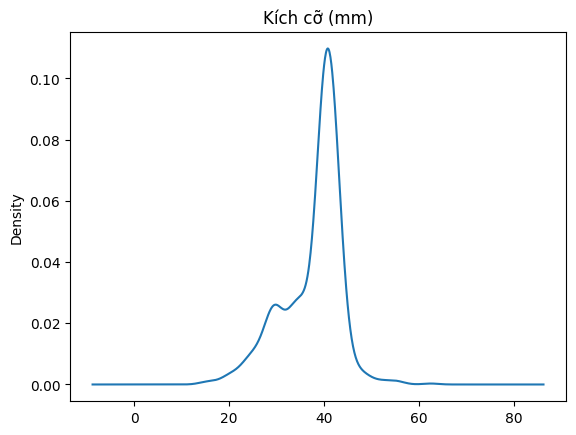

time: 2.72 s (started: 2023-05-21 22:46:31 +07:00)


In [53]:
train_ds = outlier_processing(train_ds)

for c in list(train_ds.columns):
    train_ds[c].plot(kind="kde")
    plt.title(c)
    plt.show()


Normalize data

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_need_normalize = list(train_ds.drop('Giá tiền (VNĐ)', axis=1).columns)

train_ds[cols_need_normalize] = scaler.fit_transform(train_ds[cols_need_normalize])
test_ds[cols_need_normalize] = scaler.fit_transform(test_ds[cols_need_normalize])


time: 15 ms (started: 2023-05-21 22:46:34 +07:00)


In [55]:
from sklearn.metrics import mean_squared_error

X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]

time: 0 ns (started: 2023-05-21 22:46:34 +07:00)


Tree Decision to to select feature


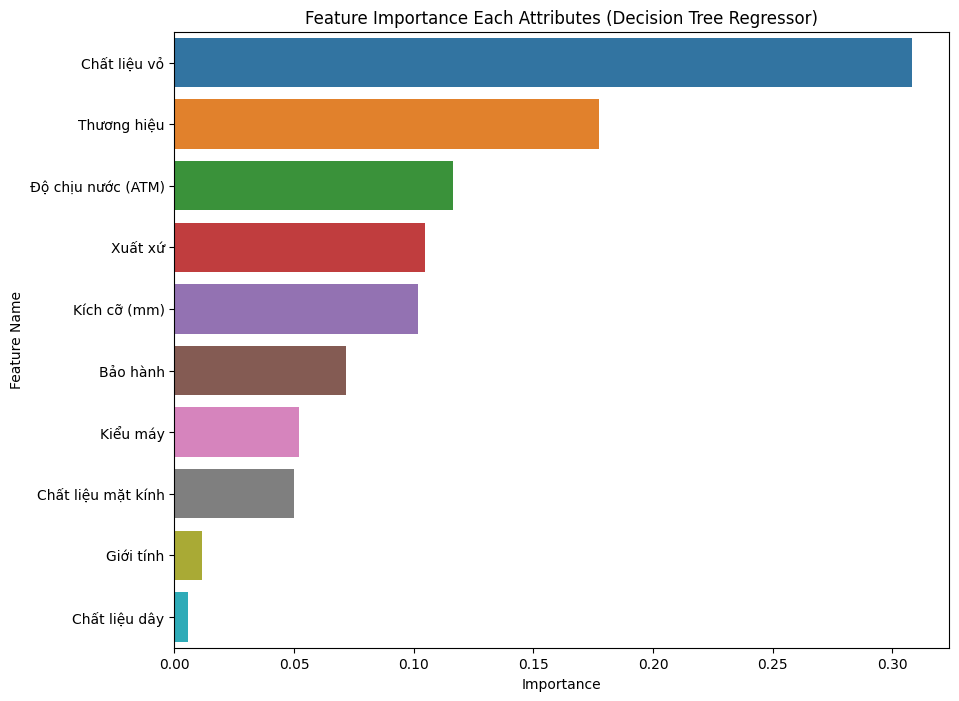

time: 265 ms (started: 2023-05-21 22:46:34 +07:00)


In [56]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)

imp_df = pd.DataFrame(
    {"Feature Name": X_train.columns, "Importance": dtree.feature_importances_}
)

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(12)
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Feature Importance Each Attributes (Decision Tree Regressor)")

plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show();

In [57]:
top_7_features = list(fi.head(7)["Feature Name"])

top_7_features.append('Giá tiền (VNĐ)')

time: 0 ns (started: 2023-05-21 22:46:34 +07:00)


In [58]:
train_ds_select_feats = train_ds[top_7_features]
test_ds_select_feats = test_ds[top_7_features]

time: 0 ns (started: 2023-05-21 22:46:34 +07:00)


In [59]:
train_ds_select_feats.shape
test_ds_select_feats.shape

(800, 8)

(200, 8)

time: 0 ns (started: 2023-05-21 22:46:34 +07:00)


In [60]:
train_ds_select_feats.to_csv('train_ds_small_process.csv', index=False)
test_ds_select_feats.to_csv('test_ds_small_process.csv', index=False)

time: 32 ms (started: 2023-05-21 22:46:34 +07:00)
